<a href="https://colab.research.google.com/github/Rionando11/Python_Projects/blob/main/Indonesian_Startup_Investment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Business Background


## Business Requirement and Objective

Indonesian investment startup offers an app that allows users to buy and sell mutual funds, which include stocks, bonds, money market, and mixed-investment options.

Our goal is to provide recommendations to the marketing team on what thematic campaigns are right to be implemented next month. By understanding the demographics of users, trends on transactions, and transaction trends for each product.

## Dataset
users dataset : https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0

daily user transaction dataset: https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0

## Data Dictionary


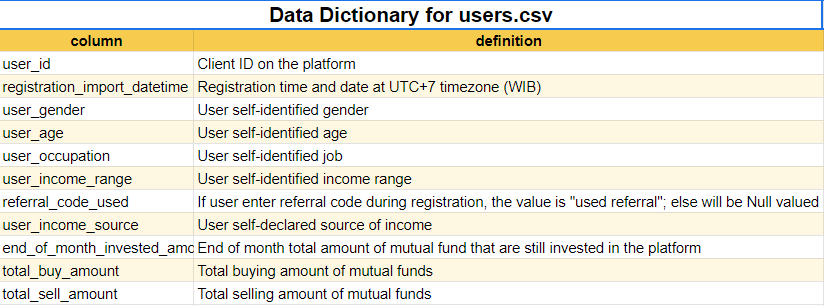

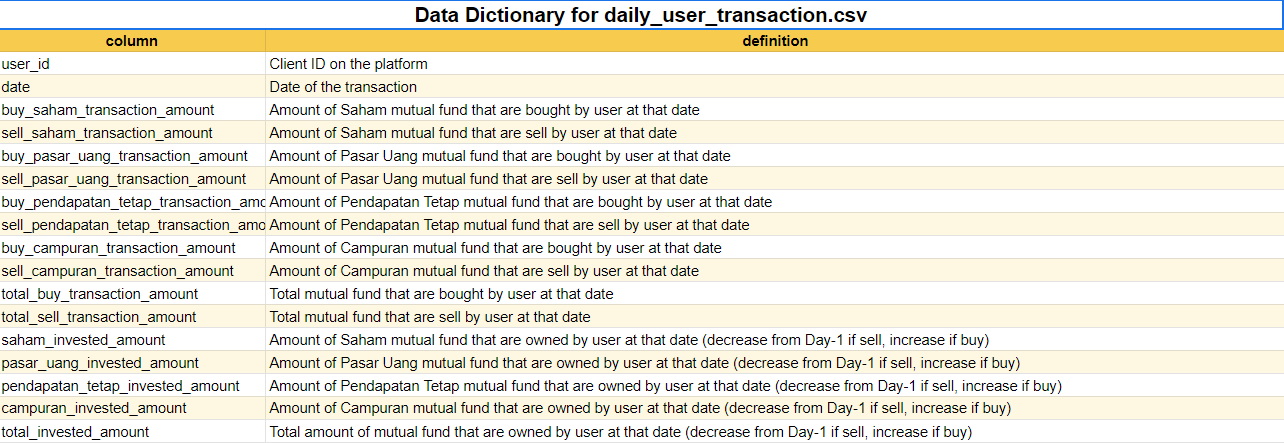

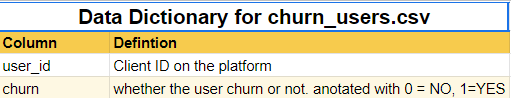

# B. Data Cleaning & Preparation

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## users table

In [ ]:
# import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
users_og = pd.read_csv(sheet_url_trf)
users_og.head()

https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


### Check Data Type

In [ ]:
users_dtype = users_og.copy()
users_dtype.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
users_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


Insight:

There are several data types that must be considered here:

* In the registration_import_datetime column, the data type is still an object (needs to be changed).
* The end_of_month_invested_amount, total_buy_amount, and total_sell_amount columns are still objects (need to be changed)




In [ ]:
users_dtype['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

#### Handle Data Type Changes

In [ ]:
# change object to datetime data type
users_dtype['registration_import_datetime'] = pd.to_datetime(users_dtype['registration_import_datetime'])

In [ ]:
# change The end_of_month_invested_amount, total_buy_amount, and total_sell_amount columns to float
# using for loop
users_col_num = ['end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount']

for val in users_col_num:
  users_dtype[val] = users_dtype[val].astype(float)

In [ ]:
users_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  float64       
 9   total_buy_amount              14712 non-null  float64       
 10  total_sell_amount             14712 non-null  float64       
dtypes: datetime64[ns](1), float6

Insight:

The data types for the registration_import_datetime, end_of_month_invested_amount, total_buy_amount, and total sell_amount fields have been replaced with the appropriate data types.



### Check Missing Values

In [ ]:
# Copy dataset 
users_miss_val = users_dtype.copy()

In [ ]:
users_miss_val.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


In [ ]:
# check data information
users_miss_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  float64       
 9   total_buy_amount              14712 non-null  float64       
 10  total_sell_amount             14712 non-null  float64       
dtypes: datetime64[ns](1), float6

Insight:

There are null values in column referral_code_used.





In [ ]:
# Calculate the total of rows with missing value on each columns
users_miss_val.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight:

In the referral_code_used column, there are 9108 missing values.



In [ ]:
# Find rows with missing value 
users_miss_val[users_miss_val['referral_code_used'].isnull()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000.0,100000.0,0.0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji,999000.0,149000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14705,4344623,2021-10-17 02:57:06,Female,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,0.0,0.0,0.0
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,0.0,0.0,0.0
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya,0.0,0.0,0.0
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri,0.0,0.0,0.0


Insight:

These are the rows with missing values in the referral_code_used column

#### Handle Missing Values

In [ ]:
# Fill null values with 'unsued'
users_miss_val['referral_code_used'].fillna(value='unused', inplace=True)
users_miss_val.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


Insight:

Replacing the null values with 'unused', means users who did not use the referral code when registering.



In [ ]:
# Ensure null values 
users_miss_val['referral_code_used'].isnull().sum()

0

Insight:

The referral_code_used column no longer has null values.



### Check Values and Typo

In [ ]:
users_typo_val = users_miss_val.copy()
users_typo_val.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


In [ ]:
users_typo_val['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

Insight:

*   The majority of users in the table have jobs as Pelajar, which is 7887 (or about 54% of the total).
*   There is no typo in user_occupation column.



In [ ]:
users_typo_val['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Insight:

*   The majority of users' sources of income in the table come from Gaji, which is 9131 (or about 62% of the total).
*   There is no typo in user income_source column.



In [ ]:
users_typo_val['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

Insight:

* The majority of users in the table are male, with a total of 8977 (or about 61% of the total).
* Meanwhile, women have fewer users than men, which is around 39% of the total (5735).
* There is no typo in user_gender column.





In [ ]:
users_typo_val['referral_code_used'].value_counts()

unused           9108
used referral    5604
Name: referral_code_used, dtype: int64

Insight:

*   More than half of users (about 56%) do not use a referral code when registering their account. A total of 9108 users filled in the 'referral_code_used' field with the value 'unused'.
*   Meanwhile, around 44% of users (5604) filled in the 'referral_code_used' field with the value 'used referral'.
*   There is no typo in reffereal_code_used column.






### Check Duplicates

In [ ]:
users_dup = users_typo_val.copy()
users_dup.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


In [ ]:
# check duplicate
users_dup[users_dup.duplicated(subset='user_id', keep=False)]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


Insight:

No duplicate data.

### Clan Data

In [ ]:
users_clean = users_dup.copy()
users_clean.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


In [ ]:
users_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  float64       
 9   total_buy_amount              14712 non-null  float64       
 10  total_sell_amount             14712 non-null  float64       
dtypes: datetime64[ns](1), float6

## daily user transaction table

In [ ]:
# import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
transaction_og = pd.read_csv(sheet_url_trf)
transaction_og.head()

https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


### Check Data Type

In [ ]:
transaction_dtype = transaction_og.copy()
transaction_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

Insight:

There are several data types that must be considered here:
*   In the date column, the data type is still an object (needs to be changed)
*   The total_buy_transaction_amount, total_sell_transaction_amount, and total_invested_amount columns are still objects (need to be changed)



#### Handle Data Type Changes

In [ ]:
# change object to datetime data type
transaction_dtype['date'] = pd.to_datetime(transaction_dtype['date'])

In [ ]:
# change The total_buy_transaction_amount, total_sell_transaction_amount, dan total_invested_amount columns to float
# using for loop
transaction_col_num = ['total_buy_transaction_amount', 'total_sell_transaction_amount', 'total_invested_amount']

for val in transaction_col_num:
  transaction_dtype[val] = transaction_dtype[val].astype(float)

In [ ]:
transaction_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Insight:

The data types for the date, total_buy_transaction_amount, total_sell_transaction_amount, and total_invested_amount have been replaced with the appropriate data types.


### Check Missing Values

In [ ]:
transaction_miss_val = transaction_dtype.copy()
transaction_miss_val.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,10000000.0,10000000.0


In [ ]:
transaction_miss_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Insight:

We can see that there are many empty values in several columns.

#### Handle Missing Values

In [ ]:
miss_cols = ['buy_saham_transaction_amount', 'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'sell_pasar_uang_transaction_amount', 
             'buy_pendapatan_tetap_transaction_amount', 'sell_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount', 
             'sell_campuran_transaction_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 
             'campuran_invested_amount']

transaction_miss_val[miss_cols] = transaction_miss_val[miss_cols].fillna(0).astype(float)
transaction_miss_val


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,10000.0,50000.0,0.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,10000.0


Insight:

Missing values have been replaced with 0, and that means no transactions.

### Check Duplicates

In [ ]:
transaction_dup = transaction_miss_val.copy()
transaction_dup.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


In [ ]:
transaction_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [ ]:
# check duplicate
transaction_dup[transaction_dup.duplicated(subset='user_id', keep=False)]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158737,4157117,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158738,4157132,2021-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158739,4157132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158740,4157266,2021-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0


Insight:

As we see, although one user ID appears several times but this is not a duplicate data, because when viewed from the date column it shows a different date.

### Clean Data

In [ ]:
transaction_clean = transaction_dup.copy()
transaction_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


In [ ]:
transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

### Merge Data

In [ ]:
users_clean.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.0,0.0,0.0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.0,0.0,0.0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.0,0.0,0.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,0.0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.0,8500000.0,0.0


In [ ]:
transaction_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


In [ ]:
# merge data
merge_df = users_clean.merge(transaction_clean, how='inner', left_on=['user_id'], right_on=['user_id'])
merge_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

### Check Outlier

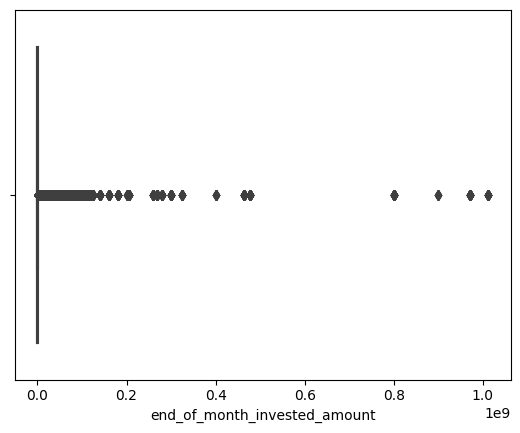

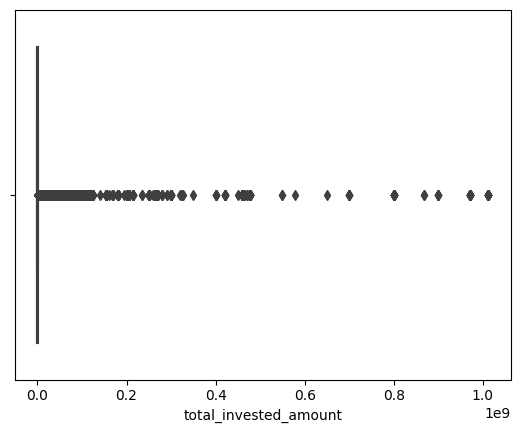

In [ ]:
numeric_cols = ['end_of_month_invested_amount', 'total_invested_amount']

for col in numeric_cols:
    sns.boxplot(data=merge_df, x=col)
    plt.show()

Insight:

In this case, due to the large number of 0 values, the outliers in the data are very visible, but in this case the outliers are not removed because it is seen from the business sector which contains investment transactions, so this still makes sense.

In [ ]:
# find quartile 1 and 3
Q1 = merge_df['end_of_month_invested_amount'].quantile(.25)
Q3 = merge_df['end_of_month_invested_amount'].quantile(.75)

# IQR
IQR = Q3 - Q1
min_val = Q1 - 1.5 * IQR
max_val = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_val)
print('\nMax:\n',max_val)

Q1:
 0.0

Q3:
 600000.0

IQR:
 600000.0

Min:
 -900000.0

Max:
 1500000.0


Insight:

Based on the calculation of the quartiles and IQR for the 'end_of_month_invested_amount' column, it can be seen that the value of the amount of investment sold is -900,000 and the maximum value is 1,500,000. The middle 50% of the amount invested lies between 0 and 600,000, with a median value of 0. This information can be used to identify outliers or extreme values in the data.

In [ ]:
# find quartile 1 and 3
Q1 = merge_df['total_invested_amount'].quantile(.25)
Q3 = merge_df['total_invested_amount'].quantile(.75)

# IQR
IQR = Q3 - Q1
min_val = Q1 - 1.5 * IQR
max_val = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_val)
print('\nMax:\n',max_val)


Q1:
 10000.0

Q3:
 500000.0

IQR:
 490000.0

Min:
 -725000.0

Max:
 1235000.0


Insight:

From these data, it can be seen that the 1st quartile (Q1) value of investing in equity fund products is 10,000 rupiah, while the 3rd quartile (Q3) value is 500,000. This shows that most of the users' equity mutual fund investments are in the range of 10,000 to 500,000. It can also be seen that the IQR (Interquartile Range) value is 490,000, which indicates that the data is quite concentrated in that range. In addition, there are outliers at the minimum and maximum values, namely -725,000 (investment sold) and 1,235,000 , which can be of concern in further analysis.

## C. EDA

In [ ]:
# Preparing a copy of df_clean for EDA
df_eda = merge_df.copy()
df_eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.0,100000.0,...,0.0,0.0,0.0,0.0,0.0,190000.0,40000.0,270000.0,0.0,500000.0


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

##Descriptive statistics:
* How many users do we have in the data?
* How is the demographic in the data?
* How many users buy products in each mutual fund?


### Descriptive information about numeric variable

In [ ]:
#Descriptive analysis after treating the outlier
# Rounds a decimal number to 3 digits after a comma
pd.set_option('display.float_format', lambda x: '%.2f' % x)

num_cols = ['end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount', 'buy_saham_transaction_amount', 
            'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'sell_pasar_uang_transaction_amount', 
            'buy_pendapatan_tetap_transaction_amount', 'sell_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount', 
            'sell_campuran_transaction_amount', 'total_buy_transaction_amount', 'total_sell_transaction_amount', 'saham_invested_amount',
            'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 'campuran_invested_amount', 'total_invested_amount'
]

desc_eda = df_eda[num_cols].describe()
desc_eda

,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00,158811.00
mean,3007509.97,2001688.76,-450616.89,10014.08,-2903.59,23459.58,-6399.93,41251.28,-4850.31,3346.29,-1118.80,78071.23,-15272.64,296057.59,694075.48,1189113.16,263204.09,2442450.32
std,28083454.05,21171492.89,4822935.01,257986.75,82683.23,1169513.85,570750.87,2319003.80,360839.43,241405.79,159321.68,2723035.02,708837.78,1759649.37,12814706.10,19132867.63,4815055.59,24900778.45
min,0.00,0.00,-185000000.00,0.00,-11766799.00,0.00,-185000000.00,0.00,-92712405.00,0.00,-50000000.00,0.00,-185000000.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,-100000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10000.00
50%,100000.00,10000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10000.00,10000.00,25000.00,0.00,100000.00
75%,600000.00,300000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000.00,100000.00,110000.00,0.00,500000.00
max,1012200000.00,799500000.00,0.00,50000000.00,0.00,289200000.00,0.00,400000000.00,0.00,50000000.00,0.00,450000000.00,0.00,61840000.00,1012200000.00,970000000.00,300000000.00,1012200000.00


Insight:

*   The average end_of_month_invested_amount is 3,007,509,970.00 with a standard deviation of 28,083,454. This suggests that the data distribution is skewed right. On the other hand, total_buy_amount has an average of 2,001,688,760.00 with a standard deviation of 21,171,492.89, indicating that the total buy transactions are higher than the sell transactions.
*   The average of total_buy_transaction_amount (78,071.23) is significantly higher than the average of total_sell_transaction_amount (-15,272.64), indicating that investors are more inclined to buy than to sell investments. There is also a significant difference in the amount invested in stocks and other assets such as money market, fixed income, and mixed.
*   The minimum value of total_sell_amount is -185,000,000.00, while the maximum is 0.00, suggesting the possibility of outliers in the data. Finally, the median of end_of_month_invested_amount, total_buy_amount, and total_sell_amount is smaller than their mean, indicating a skewed right distribution or potential outliers in the data.






<ipython-input-48-3d0c8a9a61e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['end_of_month_invested_amount'])
<ipython-input-48-3d0c8a9a61e1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['total_buy_amount'])
<ipython-input-48-3d0c8a9a61e1>:11: UserWarning: 

`distplot` is a

<Axes: xlabel='total_invested_amount', ylabel='Density'>

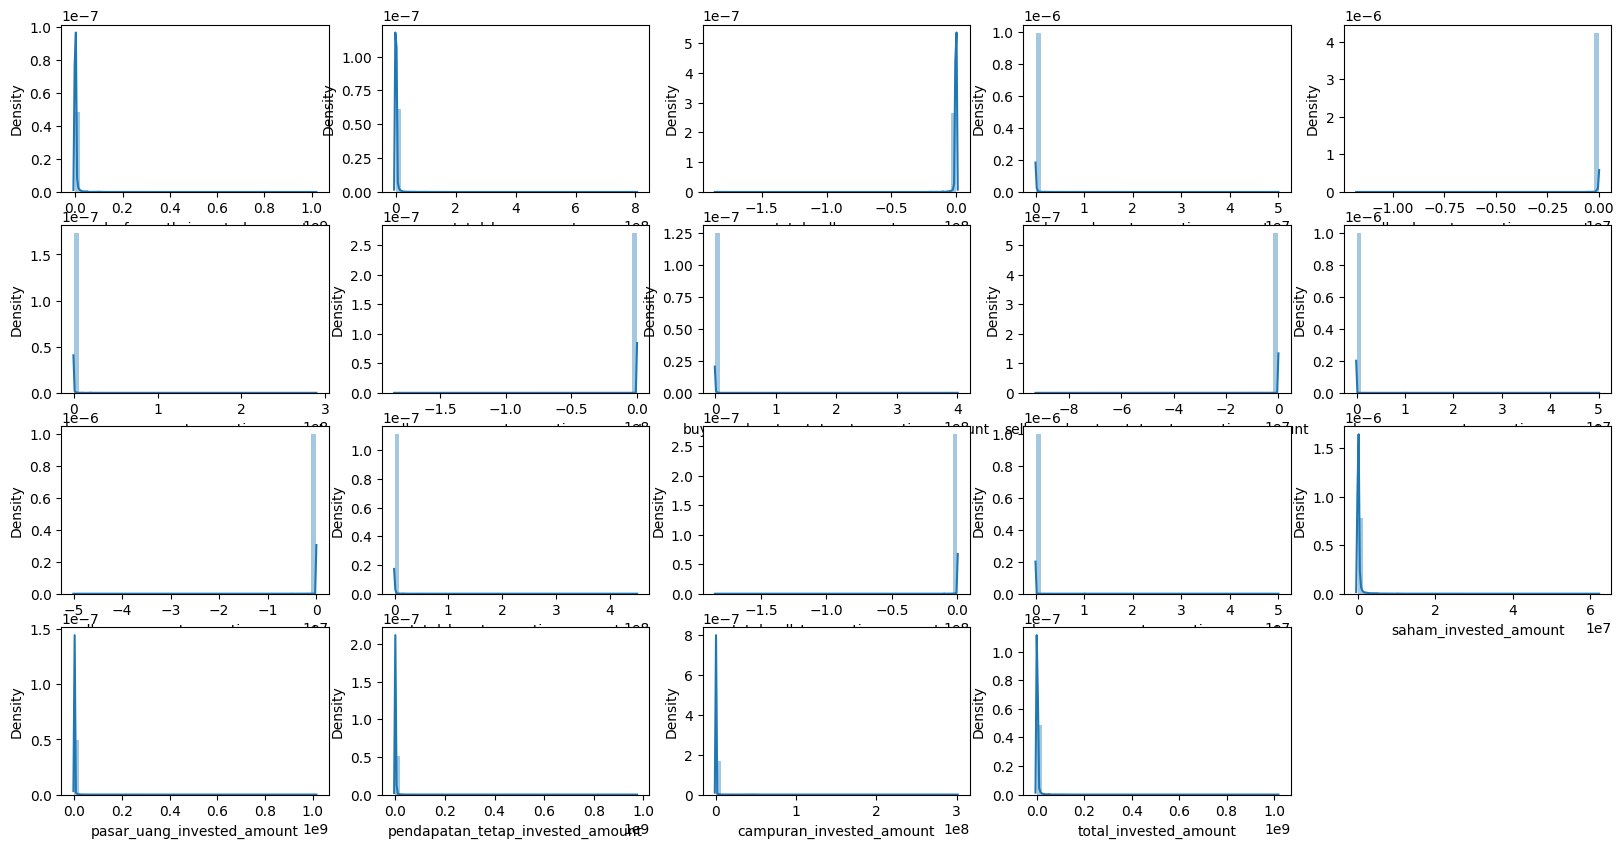

In [ ]:
#Plot data distribution
plt.figure(figsize=(20,10))

plt.subplot(4,5,1)
sns.distplot(df_eda['end_of_month_invested_amount'])

plt.subplot(4,5,2)
sns.distplot(df_eda['total_buy_amount'])

plt.subplot(4,5,3)
sns.distplot(df_eda['total_sell_amount'])

plt.subplot(4,5,4)
sns.distplot(df_eda['buy_saham_transaction_amount'])

plt.subplot(4,5,5)
sns.distplot(df_eda['sell_saham_transaction_amount'])

plt.subplot(4,5,6)
sns.distplot(df_eda['buy_pasar_uang_transaction_amount'])

plt.subplot(4,5,7)
sns.distplot(df_eda['sell_pasar_uang_transaction_amount'])

plt.subplot(4,5,8)
sns.distplot(df_eda['buy_pendapatan_tetap_transaction_amount'])

plt.subplot(4,5,9)
sns.distplot(df_eda['sell_pendapatan_tetap_transaction_amount'])

plt.subplot(4,5,10)
sns.distplot(df_eda['buy_campuran_transaction_amount'])

plt.subplot(4,5,11)
sns.distplot(df_eda['sell_campuran_transaction_amount'])

plt.subplot(4,5,12)
sns.distplot(df_eda['total_buy_transaction_amount'])

plt.subplot(4,5,13)
sns.distplot(df_eda['total_sell_transaction_amount'])

plt.subplot(4,5,14)
sns.distplot(df_eda['buy_campuran_transaction_amount'])

plt.subplot(4,5,15)
sns.distplot(df_eda['saham_invested_amount'])

plt.subplot(4,5,16)
sns.distplot(df_eda['pasar_uang_invested_amount'])

plt.subplot(4,5,17)
sns.distplot(df_eda['pendapatan_tetap_invested_amount'])

plt.subplot(4,5,18)
sns.distplot(df_eda['campuran_invested_amount'])

plt.subplot(4,5,19)
sns.distplot(df_eda['total_invested_amount'])

###Descriptive Information About String Variable

In [ ]:
# Change the data type of 'user_id' column to object data type
df_eda['user_id'] = df_eda['user_id'].astype('object')

# Perform descriptive statistical
str_var = ['user_id','user_gender', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source']
df_eda[str_var].describe()


,user_id,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,158811,158811,158811,158811,158811,158811
unique,8277,2,9,6,2,10
top,3740513,Male,Pelajar,< 10 Juta,unused,Gaji
freq,42,97149,88865,68500,107440,99611


Insight:

The dataset contains 158,811 rows and 6 columns: user_id, user_gender, user_occupation, user_income_range, referral_code_used, and user_income_source.

- There are 8,277 unique user_id, with the most frequent - user_id appearing 42 times.
- There are 2 unique user_gender, with "Male" being the most frequent gender.
- There are 9 unique user_occupation, with "Pelajar" being the most frequent occupation.
- There are 6 unique user_income_range, with "< Rp 10 Juta" being the most frequent income range.
- There are 2 unique referral_code_used, with "unused" being the most frequent referral code.
- There are 10 unique user_income_source, with "Gaji" being the most frequent income source.

The data suggests that the majority of users in the dataset are male, students, and have a monthly income below Rp 10 million. Most of the users did not use a referral code and receive income from salaries.

### Descriptive information about date type variable

In [ ]:
df_eda['registration_import_datetime'].describe()

<ipython-input-50-9de327b2f30c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['registration_import_datetime'].describe()


count                  158811
unique                   6581
top       2021-08-02 13:38:02
freq                      164
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

In [ ]:
df_eda['date'].describe()

<ipython-input-51-a9667ca0b9c1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['date'].describe()


count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

Insight:

The date starts from 2021-08-01 to 2021-09-30

###Number of Customer

QUESTION 1
* How many **users** do we have in the data?


In [ ]:
#Number of customer
df_eda['user_id'].nunique()

8277

Insight:

The dataset contains 8277 unique user in 2021

### Demographic

QUESTION 2
* How is the demographic in the data?


In [ ]:
gender_demo = df_eda.groupby('user_gender')['user_id'].nunique()
#Reset the index to make it into a pandas dataframeS
gender_demo = gender_demo.reset_index()
gender_demo

,user_gender,user_id
0,Female,3101
1,Male,5176


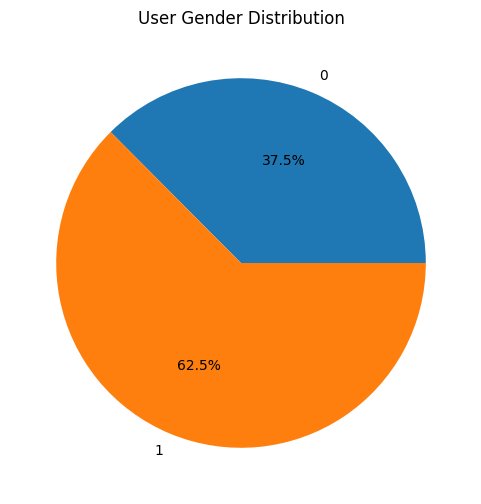

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(gender_demo['user_id'], labels=gender_demo.index, autopct='%1.1f%%')
plt.title('User Gender Distribution')
plt.show()

In [ ]:
age_demo = df_eda.groupby(['user_age'])['user_id'].nunique().reset_index()
age_demo.set_index('user_age', inplace=True)
age_demo

,user_id
user_age,
17,134
18,443
19,503
20,614
21,693
22,549
23,554
24,514
25,458


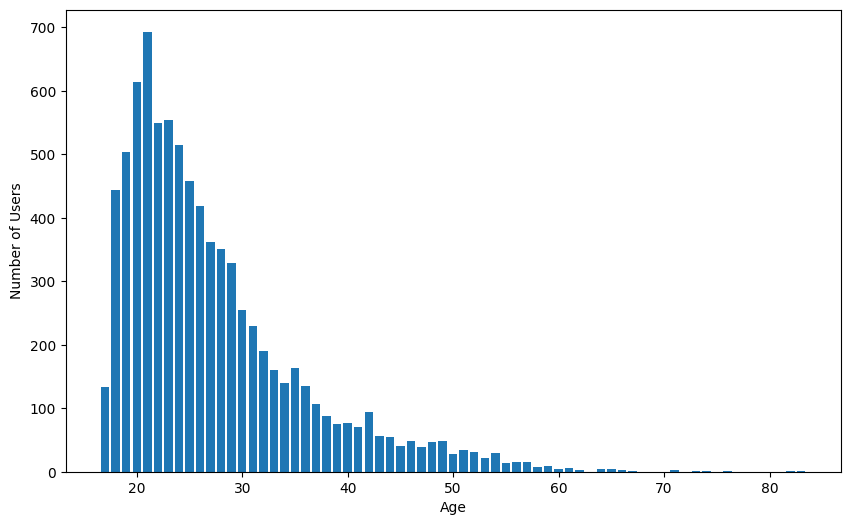

In [ ]:
# set figure size
plt.figure(figsize=(10,6))
# create the bar chart
plt.bar(age_demo.index, age_demo['user_id'])

# set the x-label and y-label
plt.xlabel('Age')
plt.ylabel('Number of Users')

# show the plot
plt.show()

Insight:

The majority of users in the data are male (62.5%) and the most common age range is 20-25 years old. The most common occupation is student (56%) followed by private employees (23%).

In [ ]:
occupation_demo = df_eda.groupby(['user_occupation'])['user_id'].nunique().reset_index()
occupation_demo.set_index('user_occupation', inplace=True)
occupation_demo

,user_id
user_occupation,
Guru,60
IRT,478
Others,928
PNS,116
Pelajar,4473
Pengusaha,324
Pensiunan,4
Swasta,1868
TNI/Polisi,26


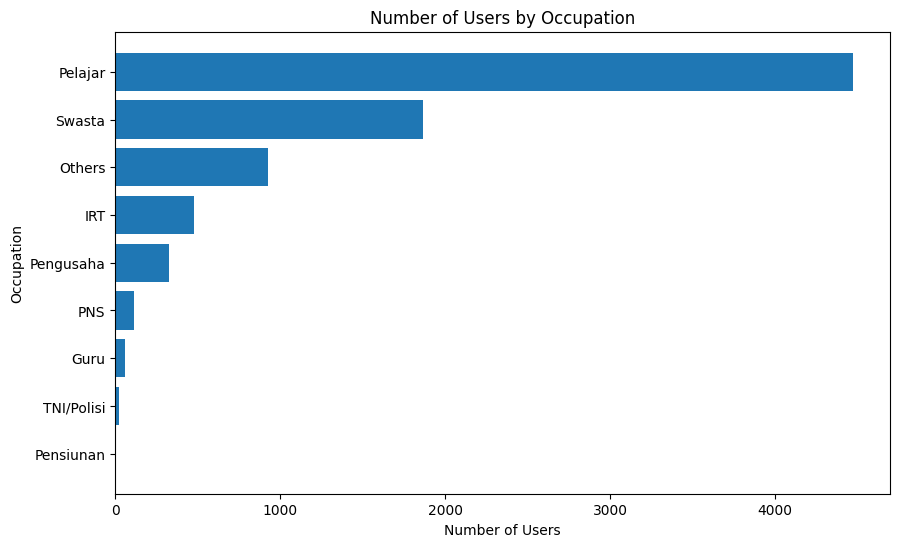

In [ ]:
# set figure size
plt.figure(figsize=(10, 6))

# sort the occupation_demo DataFrame in descending order
occupation_demo_sorted = occupation_demo.sort_values('user_id', ascending=True)

# plot horizontal bar chart with sorted data
plt.barh(occupation_demo_sorted.index, occupation_demo_sorted['user_id'])

# set plot title, xlabel, and ylabel
plt.title('Number of Users by Occupation')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')

# show plot
plt.show()


In [ ]:
income_demo = df_eda.groupby(['user_income_range'])['user_id'].nunique().reset_index()
income_demo.set_index('user_income_range', inplace=True)
income_demo

,user_id
user_income_range,
< 10 Juta,3527
> Rp 1 Miliar,16
> Rp 100 Juta - 500 Juta,637
> Rp 50 Juta - 100 Juta,1343
> Rp 500 Juta - 1 Miliar,48
Rp 10 Juta - 50 Juta,2706


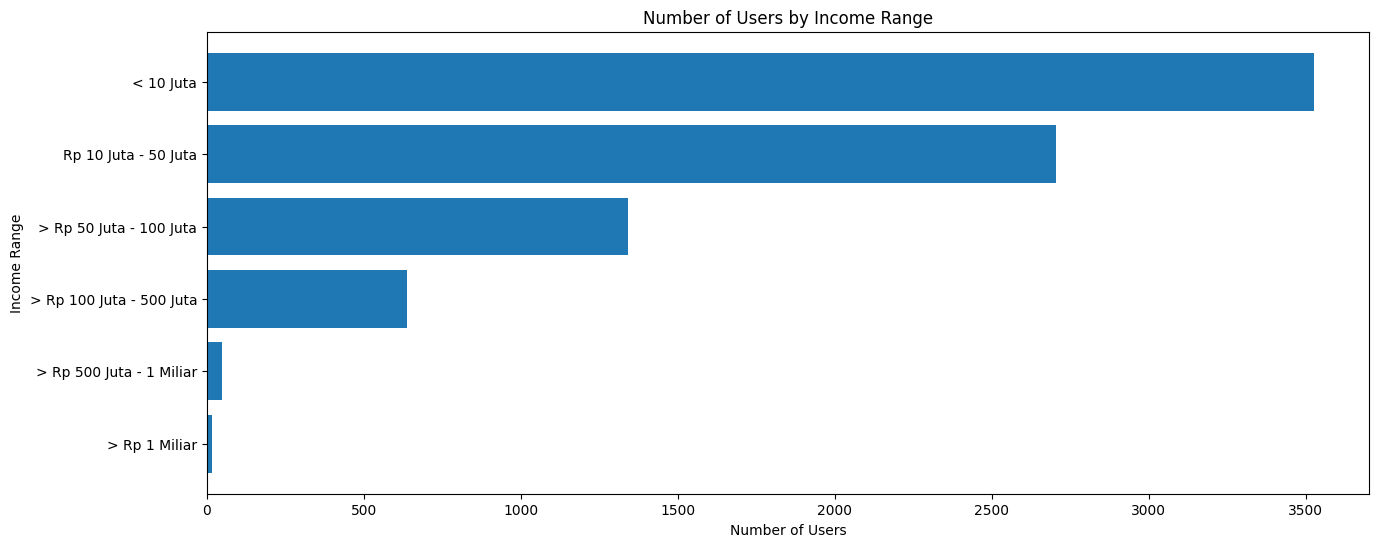

In [ ]:
# set figure size
plt.figure(figsize=(15, 6))

# sort the occupation_demo DataFrame in descending order
income_demo_sorted = income_demo.sort_values('user_id', ascending=True)

# plot horizontal bar chart with sorted data
plt.barh(income_demo_sorted.index, income_demo_sorted['user_id'])

# set plot title, xlabel, and ylabel
plt.title('Number of Users by Income Range')
plt.xlabel('Number of Users')
plt.ylabel('Income Range')

# show plot
plt.show()

### Products

QUESTION 3
* How many users buy products in each mutual fund?


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

<ipython-input-62-ea251877d6ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transaction_totals = df_eda.groupby('user_id')['buy_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount'].sum()


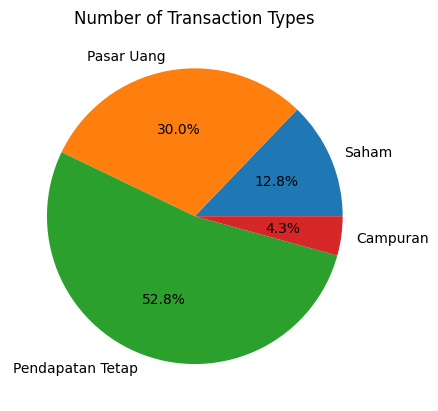

In [ ]:
# Agregasi data
transaction_totals = df_eda.groupby('user_id')['buy_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount'].sum()

# Menyiapkan data untuk pie chart
labels = ['Saham', 'Pasar Uang', 'Pendapatan Tetap', 'Campuran']
transaction_amounts = transaction_totals.sum()

# Membuat pie chart
plt.pie(transaction_amounts, labels=labels, autopct='%1.1f%%')

# Menampilkan judul
plt.title('Number of Transaction Types')

# Menampilkan pie chart
plt.show()

In [ ]:
num_users_by_saham = df_eda.groupby('buy_saham_transaction_amount')['user_id'].nunique()
print(num_users_by_saham)

buy_saham_transaction_amount
0.00           8277
114.00            1
212.00            1
443.00            3
608.00            1
               ... 
20000000.00       2
20910000.00       2
22130000.00       1
32800000.00       1
50000000.00       1
Name: user_id, Length: 422, dtype: int64


Insight:

From the data, it can be seen that the majority of investment product purchase transactions in equity mutual funds are at a nominal value of 0.00, indicating that there are many users who do not purchase equity mutual fund products. However, there are also some users who make equity mutual fund purchase transactions with quite large nominal values, reaching up to 50 million rupiahs.

In [ ]:
num_users_by_pasar_uang = df_eda.groupby('buy_pasar_uang_transaction_amount')['user_id'].nunique()
print(num_users_by_pasar_uang)

buy_pasar_uang_transaction_amount
0.00            8277
928.00             1
5000.00            1
10000.00         663
10678.00           1
                ... 
100000000.00       1
114000000.00       1
144600000.00       1
185075955.00       1
289200000.00       1
Name: user_id, Length: 408, dtype: int64


Insight:

From the data, we can see that most transactions in the pasar uang (money market) mutual fund have a value of 0.00, indicating that a large portion of users did not buy this type of mutual fund. However, there are also several users who bought this type of mutual fund with a transaction amount of 10,000.00, which is quite significant with a frequency of 663. This suggests that there is a demand for this type of mutual fund among some users.

In [ ]:
num_users_by_pendapatan_tetap = df_eda.groupby('buy_pendapatan_tetap_transaction_amount')['user_id'].nunique()
print(num_users_by_pendapatan_tetap)

buy_pendapatan_tetap_transaction_amount
0.00            8277
28.00              1
1139.00            1
1584.00            1
5000.00            2
                ... 
250000000.00       1
300000000.00       1
350000000.00       1
398000000.00       1
400000000.00       1
Name: user_id, Length: 502, dtype: int64


Insight:

From the data, it can be seen that the majority of transactions for buying fixed income mutual funds have a nominal value of 0.00, indicating that a significant portion of users do not buy fixed income mutual funds. However, there are also several users who made relatively large transactions, with some reaching up to 400 million rupiah.

In [ ]:
num_users_by_campuran = df_eda.groupby('buy_campuran_transaction_amount')['user_id'].nunique()
print(num_users_by_campuran)

buy_campuran_transaction_amount
0.00           8277
50000.00          2
100000.00         8
149000.00         1
150000.00         2
200000.00         2
300000.00         3
500000.00         3
901102.00         1
975000.00         1
1000000.00       25
1035000.00        1
1057000.00        1
1100000.00        1
1350000.00        1
1500000.00        6
2000000.00       17
2500000.00        5
3000000.00        1
3074900.00        1
5000000.00        4
5300000.00        1
6000000.00        2
7500000.00        1
8000000.00        1
9000000.00        2
10000000.00       9
13000000.00       1
13050000.00       1
15000000.00       2
20000000.00       3
24000000.00       1
50000000.00       2
Name: user_id, dtype: int64


Inisght:

From the data, it can be seen that the majority of purchase transactions for mixed mutual fund investment products are made at the nominal value of 0.00, indicating that most users do not buy mixed mutual fund products. However, there are some users who make purchase transactions of mixed mutual funds at significant nominal amounts, up to 50 million rupiahs. In addition, purchase transactions of mixed mutual funds are also made at various nominal values, ranging from 28.00 to 50 million rupiahs. It is also apparent that the number of purchase transactions of mixed mutual funds at the nominal value of 1 million rupiahs is the highest, with 25 transactions.

## Identify Trends on Dataset:
- Is there any trend on the transaction?
- How about transaction trends for each product?

In [ ]:
# prepare dataset
df_trend = merge_df.copy()
df_trend.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,...,0.00,0.00,0.00,0.00,0.00,190000.00,40000.00,270000.00,0.00,500000.00
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,...,0.00,0.00,0.00,0.00,0.00,190000.00,40000.00,270000.00,0.00,500000.00
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,...,0.00,0.00,0.00,0.00,0.00,190000.00,40000.00,270000.00,0.00,500000.00
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,...,0.00,0.00,0.00,0.00,0.00,190000.00,40000.00,270000.00,0.00,500000.00
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,...,0.00,0.00,0.00,0.00,0.00,190000.00,40000.00,270000.00,0.00,500000.00


In [ ]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

###Identify Trend

QUESTION 4
* Is there any trend on the transaction?


#### Total Transaction

In [ ]:
#Choose the variable wee need to make the chart
transaction_trend = df_trend[['date','total_buy_transaction_amount']]    
#Change the issue month into year,month format to get monthly data
transaction_trend['year_month'] = transaction_trend['date'].dt.strftime('%Y-%m-%d')

#Sort the values by the issue month, ascending
transaction_trend = transaction_trend.sort_values('date')
#sum the data and group it by the year_month
transaction_trend = transaction_trend.groupby('year_month').sum()
transaction_trend = transaction_trend.reset_index()
transaction_trend.head()

<ipython-input-69-6003d490aeda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_trend['year_month'] = transaction_trend['date'].dt.strftime('%Y-%m-%d')
<ipython-input-69-6003d490aeda>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transaction_trend = transaction_trend.groupby('year_month').sum()


,year_month,total_buy_transaction_amount
0,2021-08-04,0.00
1,2021-08-05,14570000.00
2,2021-08-06,20880000.00
3,2021-08-09,40975000.00
4,2021-08-10,24922709.00


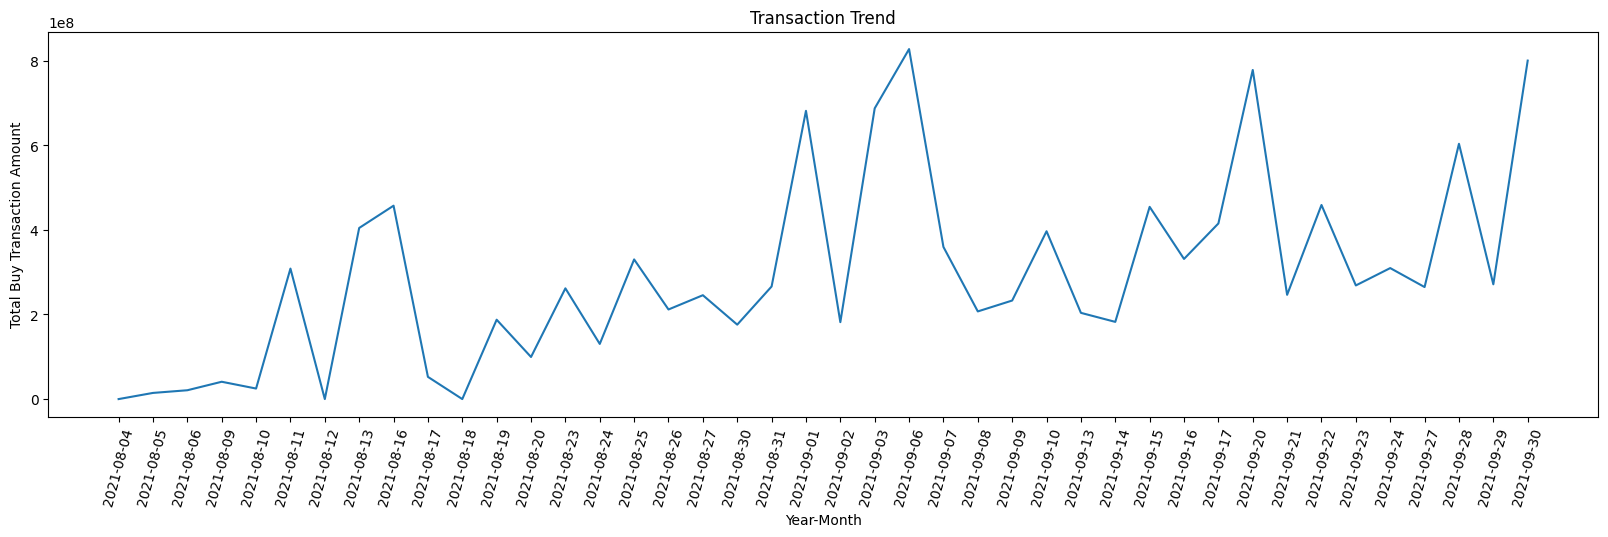

In [ ]:
plt.figure(figsize =(20, 5))
plt.plot(transaction_trend['year_month'], transaction_trend['total_buy_transaction_amount'])
plt.xlabel('Year-Month')
plt.xticks(rotation=75)
plt.ylabel('Total Buy Transaction Amount')
plt.title('Transaction Trend')
plt.show()

Insight:

Based on the line plots you provided, it appears that the total number of purchase transactions varies over time, with 
some months having a higher number of transactions than others. In addition, there is some seasonality in the data, with a higher number of transactions in the second half of each year. This suggests that there may be external factors influencing transaction trends.



#### Total Transaction Each Product

In [ ]:
#Choose the variable wee need to make the chart
u_transaction_trend = df_trend[['date','user_id']]
#Change the issue month into year,month format to get monthly data
u_transaction_trend['year_month'] = u_transaction_trend['date'].dt.strftime('%Y/%m/%d')

#Sort the values by the issue month, ascending
u_transaction_trend = u_transaction_trend.sort_values('date')  
#sum the data and group it by the year_month
u_transaction_trend = u_transaction_trend.groupby('year_month')['user_id'].count()
u_transaction_trend = u_transaction_trend.reset_index()
u_transaction_trend.head()

<ipython-input-71-2c243b752011>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_transaction_trend['year_month'] = u_transaction_trend['date'].dt.strftime('%Y/%m/%d')


,year_month,user_id
0,2021/08/04,117
1,2021/08/05,204
2,2021/08/06,315
3,2021/08/09,426
4,2021/08/10,577


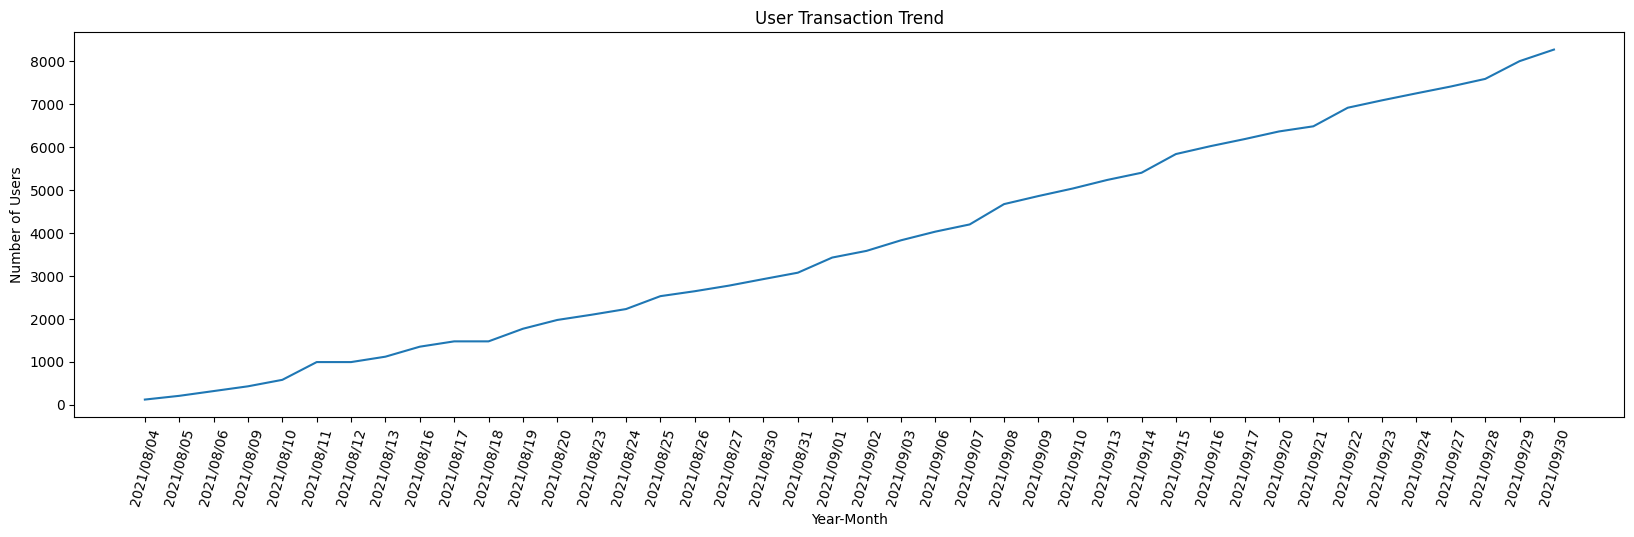

In [ ]:
plt.figure(figsize =(20, 5))
plt.plot(u_transaction_trend['year_month'], u_transaction_trend['user_id'])
plt.xlabel('Year-Month')
plt.xticks(rotation=75)
plt.ylabel('Number of Users')
plt.title('User Transaction Trend')
plt.show()

Insight:

From the plot it can be seen that the number of new users per month for the platform has experienced an increasing trend in the last 2 years (2021-2022), with quite significant fluctuations in certain months. There will be a significant peak in early 2022, indicating a drastic increase in the number of users during that period. The trend of increasing number of users may be related to several factors such as the increasing popularity of investment in the financial market and the improving economy in Indonesia.



###Identify Trend Each Product

QUESTION 5
* How about transaction trends for each product?


In [ ]:
df_sum = df_trend.groupby('date').agg(
    buy_saham_transaction_amount=('buy_saham_transaction_amount', 'sum'),
    buy_pasar_uang_transaction_amount=('buy_pasar_uang_transaction_amount', 'sum'),
    buy_pendapatan_tetap_transaction_amount=('buy_pendapatan_tetap_transaction_amount', 'sum'),
    buy_campuran_transaction_amount=('buy_campuran_transaction_amount', 'sum')
)

df_sum = df_sum.reset_index()
df_sum.head()

,date,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
0,2021-08-04,0.00,0.00,0.00,0.00
1,2021-08-05,1430000.00,2730000.00,10410000.00,0.00
2,2021-08-06,4010000.00,1555000.00,6315000.00,9000000.00
3,2021-08-09,4130000.00,6030000.00,5315000.00,25500000.00
4,2021-08-10,5779994.00,14022715.00,5020000.00,100000.00


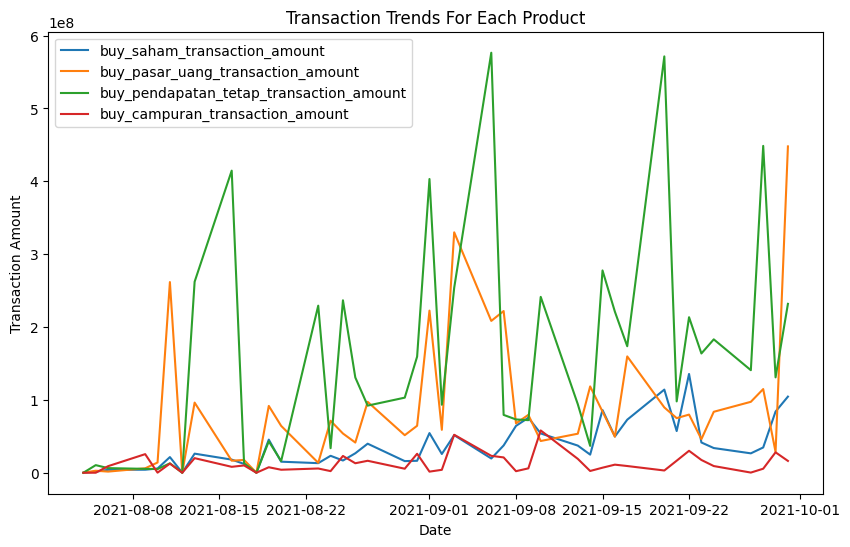

In [ ]:
# set figure size
plt.figure(figsize=(10, 6))

# plot line for each column
for col in df_sum.columns[1:]:
    plt.plot(df_sum['date'], df_sum[col], label=col)

# set plot title, xlabel, ylabel and legend
plt.title('Transaction Trends For Each Product')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()

# show plot
plt.show()


Insight:

From the plot, we can see that investment product transactions tend to increase during the observed period (July 2021 - January 2022).

The investment product with the highest number of transactions is buy_saham_transaction_amount, followed by buy_pasar_uang_transaction_amount, and buy_pendapatan_tetap_transaction_amount. Meanwhile, buy_campuran_transaction_amount has the fewest number of transactions compared to the other three investment products.

The increase in transaction volume is more significant in the investment products buy_saham_transaction_amount and buy_pasar_uang_transaction_amount during late 2021 and early 2022. Meanwhile, buy_pendapatan_tetap_transaction_amount shows a stable upward trend throughout the observed period.

From this plot, it can be concluded that there is a tendency for people to invest in the stock market and money market.

# D. Customer Segmentation

### Libraries

In [ ]:
# Libraries to create clusters
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer                                      # Generate isotropic Gaussian blobs for clustering

In [ ]:
# Prepare for segmentation
users_categorical_column = ['user_gender','referral_code_used']
users_ordinal_column = ['user_income_range']
users_many_category_column = ['user_occupation','user_income_source']

users_clust = users_clean.copy()

In [ ]:
users_clust[users_categorical_column] = pd.get_dummies(users_clust[users_categorical_column], drop_first=True)
users_clust.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,0,51,Swasta,> Rp 500 Juta - 1 Miliar,0,Gaji,0.00,0.00,0.00
1,3485491,2021-10-09 11:11:34,0,55,Others,> Rp 50 Juta - 100 Juta,0,Gaji,0.00,0.00,0.00
2,1071649,2021-10-08 01:27:30,1,50,Swasta,Rp 10 Juta - 50 Juta,0,Gaji,0.00,0.00,0.00
3,3816789,2021-08-12 07:19:32,0,53,IRT,> Rp 50 Juta - 100 Juta,0,Gaji,600000.00,100000.00,0.00
4,3802293,2021-08-15 09:31:24,0,47,PNS,> Rp 500 Juta - 1 Miliar,1,Gaji,13500000.00,8500000.00,0.00


In [ ]:
ordinal_map = {'< 10 Juta': 1,'Rp 10 Juta - 50 Juta': 2, '> Rp 50 Juta - 100 Juta': 3, '> Rp 100 Juta - 500 Juta': 4, '> Rp 500 Juta - 1 Miliar': 5, '> Rp 1 Miliar': 6}
users_clust[users_ordinal_column] = users_clust[users_ordinal_column].replace(ordinal_map)
users_clust.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,0,51,Swasta,5,0,Gaji,0.00,0.00,0.00
1,3485491,2021-10-09 11:11:34,0,55,Others,3,0,Gaji,0.00,0.00,0.00
2,1071649,2021-10-08 01:27:30,1,50,Swasta,2,0,Gaji,0.00,0.00,0.00
3,3816789,2021-08-12 07:19:32,0,53,IRT,3,0,Gaji,600000.00,100000.00,0.00
4,3802293,2021-08-15 09:31:24,0,47,PNS,5,1,Gaji,13500000.00,8500000.00,0.00


In [ ]:
dum_df = pd.get_dummies(users_clust, columns=users_many_category_column, prefix=users_many_category_column)
users_clust = users_clust.merge(dum_df)
users_clust = users_clust.drop(users_many_category_column,axis=1)
users_clust.head()

,user_id,registration_import_datetime,user_gender,user_age,user_income_range,referral_code_used,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_occupation_Guru,...,user_income_source_Bunga Simpanan,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
0,162882,2021-09-17 14:10:44,0,51,5,0,0.00,0.00,0.00,0,...,0,0,0,1,0,0,0,0,0,0
1,3485491,2021-10-09 11:11:34,0,55,3,0,0.00,0.00,0.00,0,...,0,0,0,1,0,0,0,0,0,0
2,1071649,2021-10-08 01:27:30,1,50,2,0,0.00,0.00,0.00,0,...,0,0,0,1,0,0,0,0,0,0
3,3816789,2021-08-12 07:19:32,0,53,3,0,600000.00,100000.00,0.00,0,...,0,0,0,1,0,0,0,0,0,0
4,3802293,2021-08-15 09:31:24,0,47,5,1,13500000.00,8500000.00,0.00,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
users_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   14712 non-null  int64         
 1   registration_import_datetime              14712 non-null  datetime64[ns]
 2   user_gender                               14712 non-null  uint8         
 3   user_age                                  14712 non-null  int64         
 4   user_income_range                         14712 non-null  int64         
 5   referral_code_used                        14712 non-null  uint8         
 6   end_of_month_invested_amount              14712 non-null  float64       
 7   total_buy_amount                          14712 non-null  float64       
 8   total_sell_amount                         14712 non-null  float64       
 9   user_occupation_Guru        

In [ ]:
# Prepare data for clustering
numerical_column = ['end_of_month_invested_amount','total_buy_amount','total_sell_amount']

#### Minmax Scaler

In [ ]:
scaler = MinMaxScaler()
users_clust[numerical_column] = scaler.fit_transform(users_clust[numerical_column])
users_clust.head()

,user_id,registration_import_datetime,user_gender,user_age,user_income_range,referral_code_used,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_occupation_Guru,...,user_income_source_Bunga Simpanan,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
0,162882,2021-09-17 14:10:44,0,51,5,0,0.00,0.00,1.00,0,...,0,0,0,1,0,0,0,0,0,0
1,3485491,2021-10-09 11:11:34,0,55,3,0,0.00,0.00,1.00,0,...,0,0,0,1,0,0,0,0,0,0
2,1071649,2021-10-08 01:27:30,1,50,2,0,0.00,0.00,1.00,0,...,0,0,0,1,0,0,0,0,0,0
3,3816789,2021-08-12 07:19:32,0,53,3,0,0.00,0.00,1.00,0,...,0,0,0,1,0,0,0,0,0,0
4,3802293,2021-08-15 09:31:24,0,47,5,1,0.01,0.01,1.00,0,...,0,0,0,1,0,0,0,0,0,0


#### Organize columns name

In [ ]:
# Make user_id as index
users_clust = users_clust.set_index('user_id')
users_clust.head()

,registration_import_datetime,user_gender,user_age,user_income_range,referral_code_used,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_occupation_Guru,user_occupation_IRT,...,user_income_source_Bunga Simpanan,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
user_id,,,,,,,,,,,,,,,,,,,,,
162882,2021-09-17 14:10:44,0,51,5,0,0.00,0.00,1.00,0,0,...,0,0,0,1,0,0,0,0,0,0
3485491,2021-10-09 11:11:34,0,55,3,0,0.00,0.00,1.00,0,0,...,0,0,0,1,0,0,0,0,0,0
1071649,2021-10-08 01:27:30,1,50,2,0,0.00,0.00,1.00,0,0,...,0,0,0,1,0,0,0,0,0,0
3816789,2021-08-12 07:19:32,0,53,3,0,0.00,0.00,1.00,0,1,...,0,0,0,1,0,0,0,0,0,0
3802293,2021-08-15 09:31:24,0,47,5,1,0.01,0.01,1.00,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Drop unnecessary columns
users_clust = users_clust.drop(['registration_import_datetime'],axis=1)
users_clust.head()

,user_gender,user_age,user_income_range,referral_code_used,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_occupation_Guru,user_occupation_IRT,user_occupation_Others,...,user_income_source_Bunga Simpanan,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
user_id,,,,,,,,,,,,,,,,,,,,,
162882,0,51,5,0,0.00,0.00,1.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3485491,0,55,3,0,0.00,0.00,1.00,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1071649,1,50,2,0,0.00,0.00,1.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3816789,0,53,3,0,0.00,0.00,1.00,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3802293,0,47,5,1,0.01,0.01,1.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
users_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 162882 to 4401986
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_gender                               14712 non-null  uint8  
 1   user_age                                  14712 non-null  int64  
 2   user_income_range                         14712 non-null  int64  
 3   referral_code_used                        14712 non-null  uint8  
 4   end_of_month_invested_amount              14712 non-null  float64
 5   total_buy_amount                          14712 non-null  float64
 6   total_sell_amount                         14712 non-null  float64
 7   user_occupation_Guru                      14712 non-null  uint8  
 8   user_occupation_IRT                       14712 non-null  uint8  
 9   user_occupation_Others                    14712 non-null  uint8  
 10  user_occupation_PNS        

### Cluster

#### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

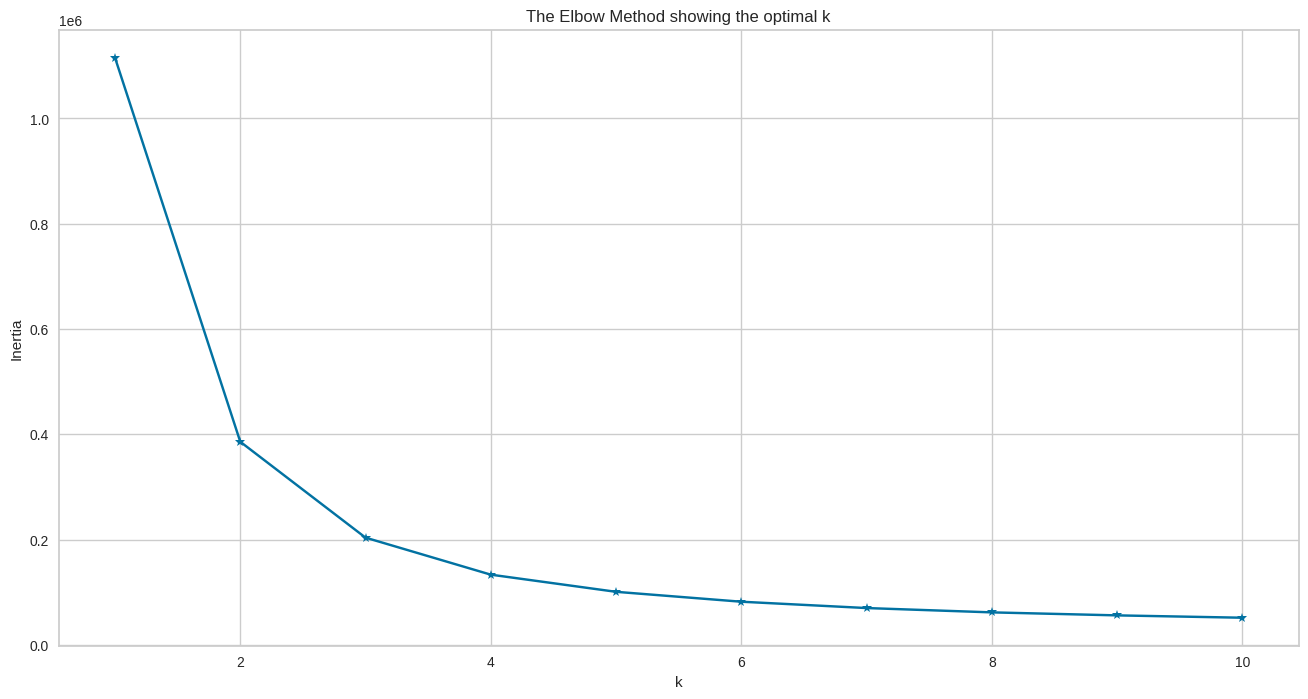

[1115356.0805807393, 385937.18557317776, 203815.0948954365, 133507.38053135297, 100919.54263475124, 82107.25510378653, 70083.12983868307, 61867.173656888976, 56165.320562959474, 51710.0537802879]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(k, random_state=42)
    kmeanModel.fit(users_clust)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Insight:

Using 3 clusters is a good choice because the clusters after that no longer cause significant degradation.

#### Silhouette analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.6343088435444955


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.5286829350278098


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.4845440113805588


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.41712310272179204


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.3825299609941393


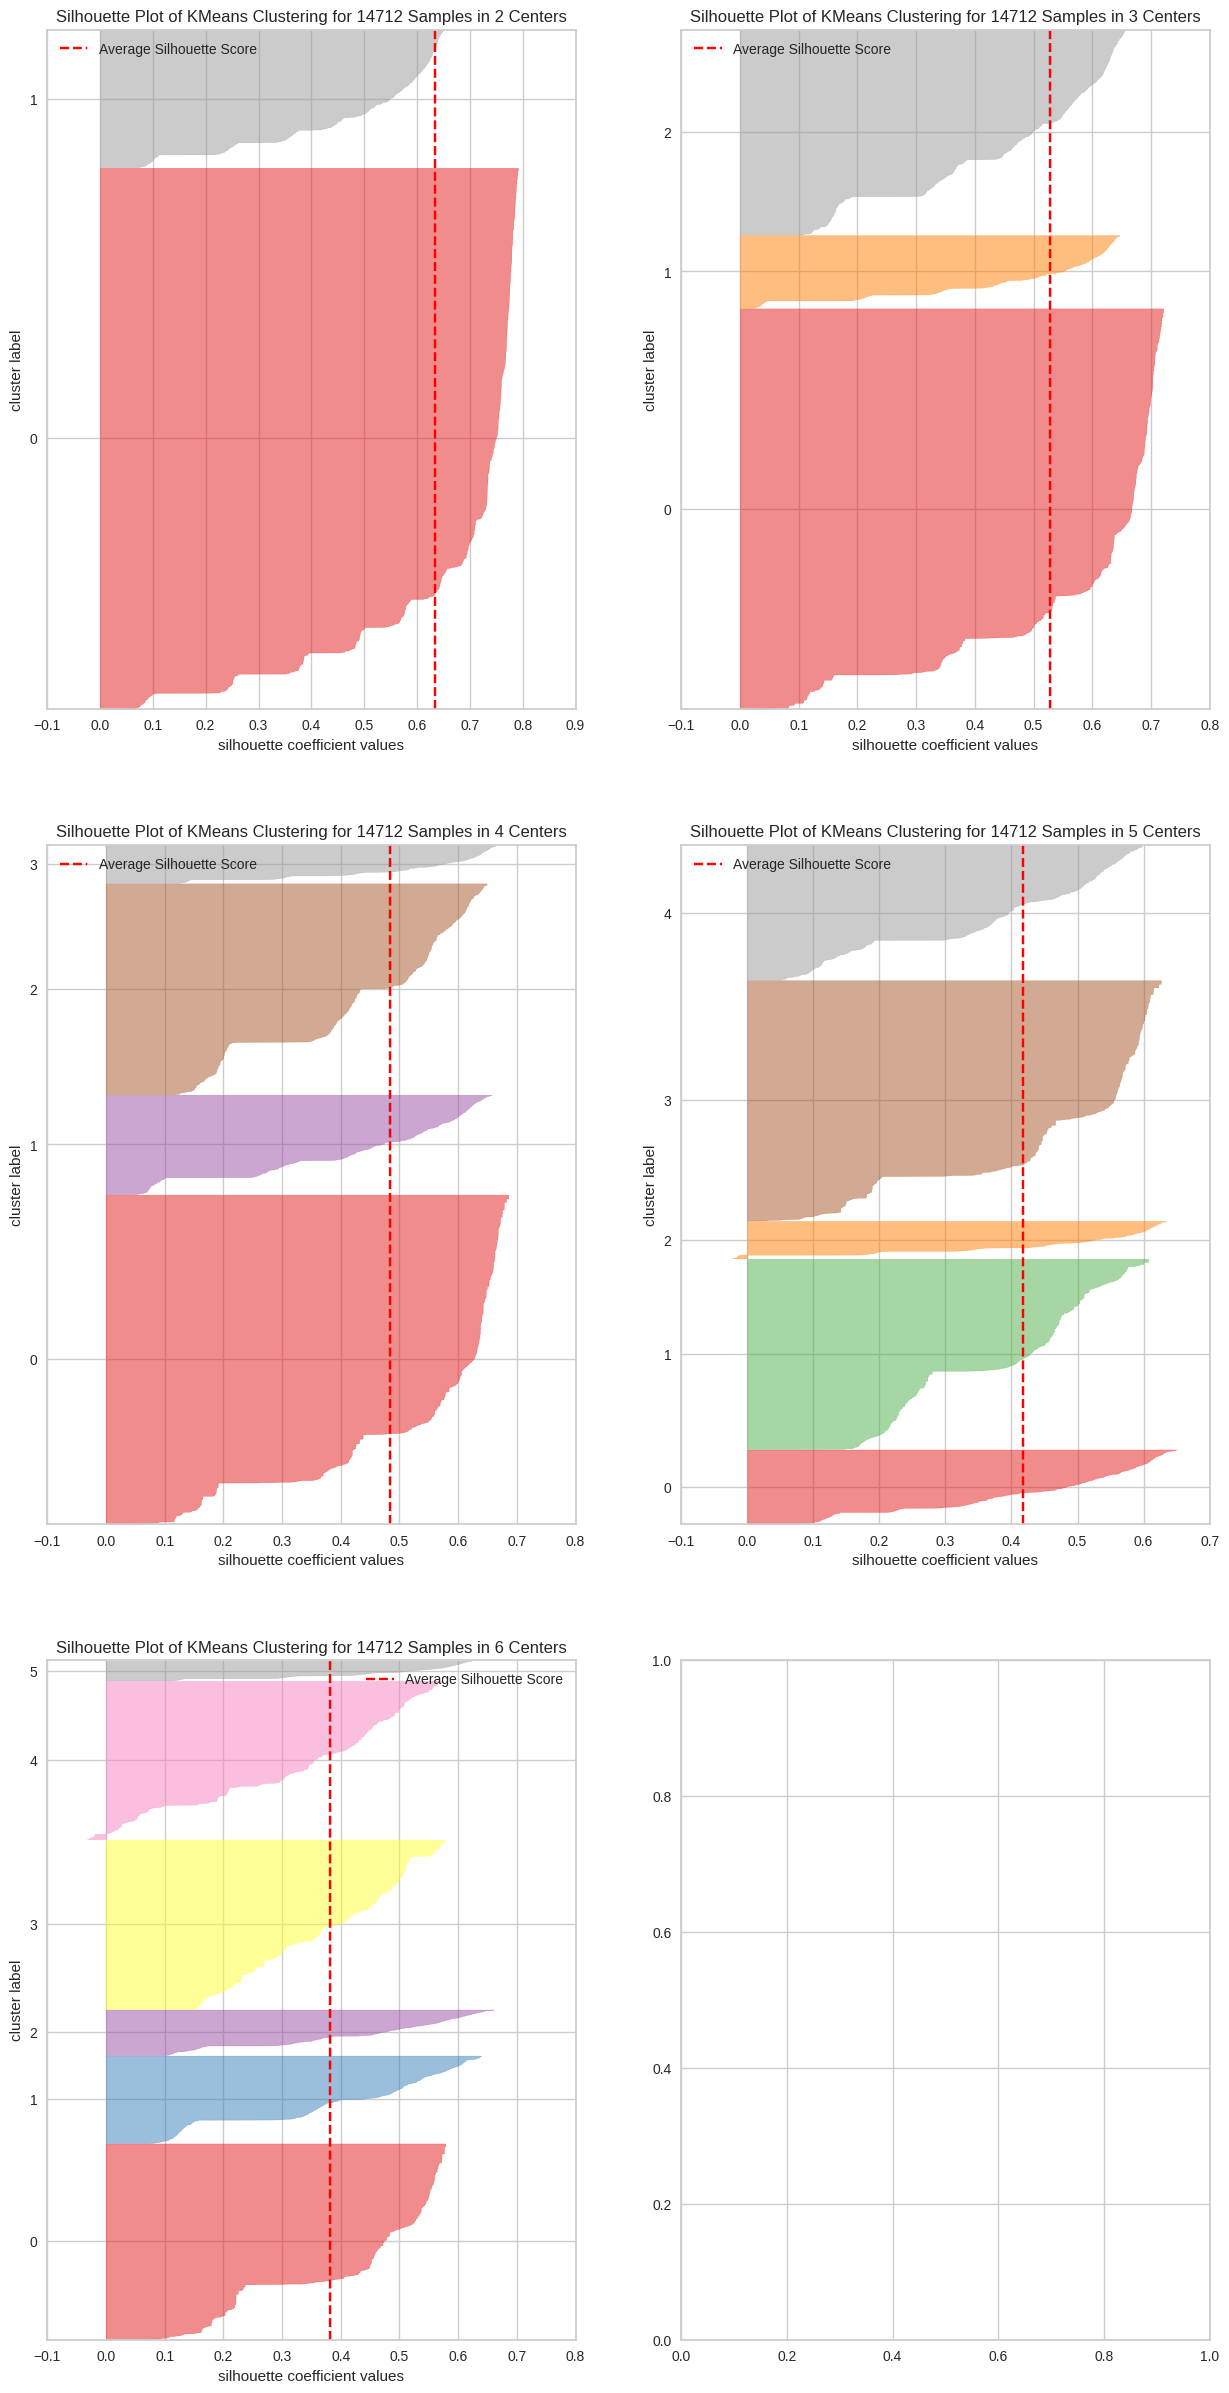

In [ ]:
# Silhouette score plot
K = range(2,7)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(users_clust)
  sil.finalize()
  print(f"For k={k}, the average silhouette score is {sil.silhouette_score_}")

Insight:

In this case, the best silhouette score is the one with the highest value, which is 0.6343088435444955. This silhouette is considered the best because it has a greater distance between clusters compared to the other silhouettes.

#### Interpreting clusters

In [ ]:
# Let's get the label for k = 4
# Initialize KMeans for 4 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 42)
cluster_model.fit(users_clust)
users_clean['cluster'] = cluster_model.labels_
users_clean.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,cluster
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,unused,Gaji,0.00,0.00,0.00,3
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,unused,Gaji,0.00,0.00,0.00,3
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,unused,Gaji,0.00,0.00,0.00,3
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,unused,Gaji,600000.00,100000.00,0.00,3
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000.00,8500000.00,0.00,3


In [ ]:
# Grouping data by cluster
for x in ['user_gender','user_age','user_occupation','user_income_range','referral_code_used','user_income_source']:
  user_cluster_grouped = users_clean.groupby(['cluster',x])
  with pd.option_context('display.max_rows', None,):
    print(user_cluster_grouped['user_id'].agg(['count'])['count'].groupby('cluster', group_keys=False).nlargest(3))

cluster  user_gender
0        Male           2773
         Female         1808
1        Male           1272
         Female          890
2        Male           4521
         Female         2635
3        Male            411
         Female          402
Name: count, dtype: int64
cluster  user_age
0        25           792
         26           744
         27           668
1        33           280
         34           262
         35           262
2        21          1192
         20          1058
         23          1031
3        49            82
         46            81
         45            80
Name: count, dtype: int64
cluster  user_occupation
0        Pelajar            1834
         Swasta             1415
         Others              667
1        Swasta             1205
         IRT                 274
         Others              269
2        Pelajar            5997
         Others              681
         Swasta              273
3        Swasta              370
         I

In [ ]:
nominal_column = ['end_of_month_invested_amount','total_buy_amount','total_sell_amount']
user_cluster_grouped = users_clean.groupby(['cluster'])
with pd.option_context('display.float_format', lambda x: '%.2f' % x):
  print(user_cluster_grouped[nominal_column].agg(['mean']))

        end_of_month_invested_amount total_buy_amount total_sell_amount
                                mean             mean              mean
cluster                                                                
0                         1950648.34       1142844.81        -193280.23
1                         2427867.44       1453480.50        -248462.12
2                          453911.24        235149.07         -96469.79
3                         4723663.27       2875825.04        -384419.64


characteristic:
- cluster 0: male, age between 25-27, student, moderate investment 
- cluster 1: male, age between 33-35, worker, moderate investment but higher than cluster 0
- cluster 2: male, age 20-23, student, low investment
- cluster 3: male female balanced, age 45-59, worker, highest investment

With that characteristic, we can name them:
- Cluster 0: The Prosperity Builders
- Cluster 1: The Wealth Guardians
- Cluster 2: The Fresh Explorers
- Cluster 3: The Retirement Planners

For each type of investor, we can have a theme:
- The Prosperity Builders: A marketing campaign that emphasizes the opportunity to grow financially and succeed through portfolio diversification, smart investing, and professional advice. Focus on long-term wealth building and increasing investment value.
- The Wealth Guardians: A marketing campaign highlighting the importance of risk management in preserving wealth. Emphasizes risk management strategies, asset protection and understanding market volatility. Provides guidance on how to protect and preserve wealth sustainably.
- The Fresh Explorers: tA marketing campaign that presents success stories and real-life experiences of successful investors. Highlighting their inspiration and success as an approach to motivate potential new investors and encourage exploration in the world of investment.
- The Retirement Planners: A marketing campaign offering investment products and services focused on retirement planning. Highlighted the importance of early preparation and setting up a secure and sustainable retirement fund. Promotes financial security and stability during retirement.